In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("biodiesel yield.txt",sep='\t', header=None, names=["Temperature [°C]","Pressure [Mpa]","Reaction Time [min]","Methanol/Oil","Experimented Yield [-]"])
df.head()

,Temperature [°C],Pressure [Mpa],Reaction Time [min],Methanol/Oil,Experimented Yield [-]
0,270,20,3,40,0.0909
1,270,20,5,40,0.1985
2,270,20,10,40,0.4127
3,270,20,15,40,0.5885
4,270,20,20,40,0.7424


In [3]:
df.shape

(42, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature [°C]        42 non-null     int64  
 1   Pressure [Mpa]          42 non-null     int64  
 2   Reaction Time [min]     42 non-null     int64  
 3   Methanol/Oil            42 non-null     int64  
 4   Experimented Yield [-]  42 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.8 KB


In [5]:
df.describe()

,Temperature [°C],Pressure [Mpa],Reaction Time [min],Methanol/Oil,Experimented Yield [-]
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,328.333333,18.333333,15.428571,33.333333,0.685640
std,40.973916,3.771955,9.507745,9.542374,0.326442
min,270.000000,10.000000,3.000000,20.000000,0.054100
25%,300.000000,20.000000,5.000000,20.000000,0.416800
50%,325.000000,20.000000,15.000000,40.000000,0.766950
75%,350.000000,20.000000,25.000000,40.000000,1.000000
max,400.000000,20.000000,30.000000,40.000000,1.000000


In [6]:
df.isnull().sum()

Temperature [°C]          0
Pressure [Mpa]            0
Reaction Time [min]       0
Methanol/Oil              0
Experimented Yield [-]    0
dtype: int64

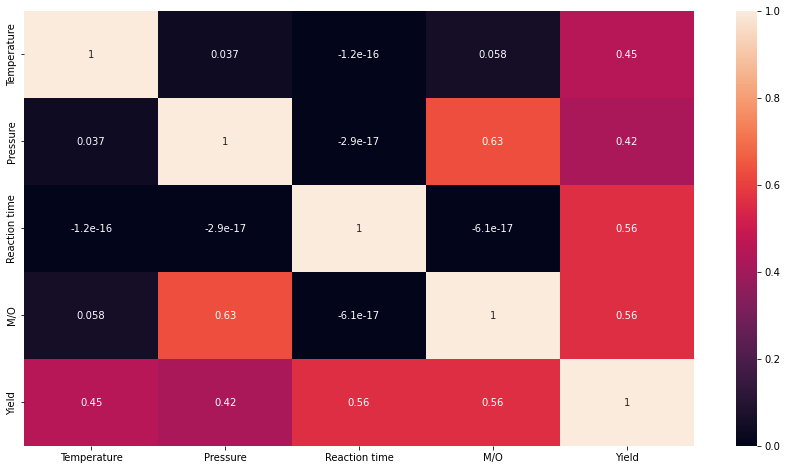

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions    

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [14]:
df1=df.sample(frac=1)
df1.head()

,Temperature [°C],Pressure [Mpa],Reaction Time [min],Methanol/Oil,Experimented Yield [-]
36,325,20,5,20,0.2514
3,270,20,15,40,0.5885
12,300,20,25,40,1.0000
23,400,20,10,40,1.0000
29,325,10,5,20,0.1036


In [15]:
scale_df=StandardScaler().fit_transform(df1)
scale_df=pd.DataFrame(scale_df, columns=df.columns)
scale_df.head()

,Temperature [°C],Pressure [Mpa],Reaction Time [min],Methanol/Oil,Experimented Yield [-]
0,-0.082339,0.447214,-1.110146,-1.414214,-1.346347
1,-1.440927,0.447214,-0.045622,0.707107,-0.301181
2,-0.699879,0.447214,1.018901,0.707107,0.974661
3,1.770282,0.447214,-0.577884,0.707107,0.974661
4,-0.082339,-2.236068,-1.110146,-1.414214,-1.804596


In [17]:
X=scale_df.drop(columns="Experimented Yield [-]")
y=scale_df['Experimented Yield [-]']

In [18]:
X.head()

,Temperature [°C],Pressure [Mpa],Reaction Time [min],Methanol/Oil
0,-0.082339,0.447214,-1.110146,-1.414214
1,-1.440927,0.447214,-0.045622,0.707107
2,-0.699879,0.447214,1.018901,0.707107
3,1.770282,0.447214,-0.577884,0.707107
4,-0.082339,-2.236068,-1.110146,-1.414214


In [19]:
y.head()

0   -1.346347
1   -0.301181
2    0.974661
3    0.974661
4   -1.804596
Name: Experimented Yield [-], dtype: float64

In [20]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, test_size=0.3, random_state=42)

## SUPPORT VECTOR MACHINES

In [21]:
k=["rbf", "linear", "poly", "sigmoid"]
c=[1,10,100, 1000, 10000,100000]
g=[1e-4,1e-3,0.01,0.1,0.2,0.5,0.6,0.9]
param_grid=dict(kernel=k,C=c, gamma=g)
print(param_grid)

{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9]}


In [22]:
from sklearn.model_selection import cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score, mean_absolute_error

In [23]:
svr=SVR(epsilon=0.01)
scorer=make_scorer(r2_score,greater_is_better=True)
grid=GridSearchCV(svr, param_grid, cv=5, scoring=scorer)
grid.fit(X_train1, y_train1.ravel())
svr_params=grid.best_params_
svr_params

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [24]:
svr=SVR(kernel="rbf", C=1000, gamma=0.01, epsilon=0.01)
svr.fit(X_train1, y_train1.ravel())
y_preds=svr.predict(X_test1)
y_preds

array([-0.22030289, -1.29568233, -1.77730787,  0.14242587, -1.76775495,
       -0.95807633,  1.0909596 ,  0.81843033, -0.47485903,  1.14085172,
        0.56177798,  1.04330746,  0.49751879])

In [176]:
r2_score(y_test1,y_preds)

0.9635996680841044

In [177]:
mean_squared_error(y_test1,y_preds)

0.03782770340618557

## EXTREME LEARNING MACHINE

In [133]:
X1=df.iloc[:, 1:-1].values
y1=df.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X1, y1, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

In [134]:
from skelm import ELMRegressor
import warnings
warnings.filterwarnings(action="ignore")

In [128]:
elm=ELMRegressor(batch_size=100, random_state=42)

In [135]:
elm.fit(X_train, y_train)

ELMRegressor(batch_size=100, random_state=42)

In [136]:
pred=elm.fit(X_train, y_train).predict(X_test)

In [137]:
pred

array([[ 0.90938887],
       [ 1.08053905],
       [-0.05232802],
       [ 1.01417277],
       [ 0.90938887],
       [-0.31633032],
       [ 1.01417277],
       [-1.62087546],
       [-1.43214764],
       [ 1.08053905],
       [ 1.08053905],
       [ 1.01417277],
       [ 0.68805387]])

In [138]:
r2_score(y_test, pred)

0.9143085687714477

## RANDOM FOREST REGRESSOR

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
param_grid=[{"n_estimators" : [3,10,30,100,300],
            "max_features" : [2,4,6,8,10,12,14]},
            {"bootstrap" : [False], "n_estimators" : [3,10,12],
            "max_features" : [2,3,4]}
           ]

In [141]:
forest_regressor = RandomForestRegressor({"bootstrap" : True, "ccp_alpha"  :0.0, "criterion" : "r2",
                                         "max_depth" : None, "max_features":8, "max_leaf_nodes" : None,
                                         "max_samples" : None, "min_impurity_decrease" : 0.0,
                                         "min_inpurity_split" : None, "min_samples_leaf" : 1,
                                         "min_samples_split" : 2, "min_weight_fraction_leaf": 0.0,
                                         "n_estimators" : 300, "n_jobs" : None, "oob_score": False,
                                         "random_state" : None, "Verbose" : 0, "warm_start": False})

In [142]:
grid_search=GridSearchCV(forest_regressor, param_grid, cv=5,
                        return_train_score=True,refit=True)
y_pred_ran=grid_search.fit(X_train1, y_train1.ravel()).predict(X_test1)
y_pred_ran

array([ 0.93315587,  0.91753986, -1.23451371,  0.66247492, -0.20571734,
        0.18209918, -0.21346851, -0.85725944, -0.49100148,  0.8798382 ,
       -1.69528417, -1.21459838,  0.66268162])

In [143]:
r2_score(y_test1, y_pred_ran)

0.9628115986058652

## NEURAL NETWORK

In [145]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor

In [146]:
ann=tf.keras.models.Sequential()

In [147]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [148]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [149]:
ann.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [150]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [151]:
history=ann.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback])

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.9607 - mean_squared_error: 0.9607 - val_loss: 0.7629 - val_mean_squared_error: 0.7629
Epoch 2/300
1/1 [==============================] - 0s 55ms/step - loss: 0.7629 - mean_squared_error: 0.7629 - val_loss: 0.5897 - val_mean_squared_error: 0.5897
Epoch 3/300
1/1 [==============================] - 0s 55ms/step - loss: 0.5897 - mean_squared_error: 0.5897 - val_loss: 0.4242 - val_mean_squared_error: 0.4242
Epoch 4/300
1/1 [==============================] - 0s 61ms/step - loss: 0.4242 - mean_squared_error: 0.4242 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 5/300
1/1 [==============================] - 0s 57ms/step - loss: 0.2780 - mean_squared_error: 0.2780 - val_loss: 0.1780 - val_mean_squared_error: 0.1780
Epoch 6/300
1/1 [==============================] - 0s 58ms/step - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 7/300
1/1 [=========================

Epoch 52/300
1/1 [==============================] - 0s 117ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 53/300
1/1 [==============================] - 0s 98ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 54/300
1/1 [==============================] - 0s 96ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 55/300
1/1 [==============================] - 0s 61ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 56/300
1/1 [==============================] - 0s 57ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 57/300
1/1 [==============================] - 0s 71ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 58/300
1/1 [===============

Epoch 100/300
1/1 [==============================] - 0s 59ms/step - loss: 4.6850e-04 - mean_squared_error: 4.6850e-04 - val_loss: 4.5717e-04 - val_mean_squared_error: 4.5717e-04
Epoch 101/300
1/1 [==============================] - 0s 56ms/step - loss: 4.5717e-04 - mean_squared_error: 4.5717e-04 - val_loss: 4.4710e-04 - val_mean_squared_error: 4.4710e-04
Epoch 102/300
1/1 [==============================] - 0s 56ms/step - loss: 4.4710e-04 - mean_squared_error: 4.4710e-04 - val_loss: 4.3856e-04 - val_mean_squared_error: 4.3856e-04
Epoch 103/300
1/1 [==============================] - 0s 55ms/step - loss: 4.3856e-04 - mean_squared_error: 4.3856e-04 - val_loss: 4.2949e-04 - val_mean_squared_error: 4.2949e-04
Epoch 104/300
1/1 [==============================] - 0s 61ms/step - loss: 4.2949e-04 - mean_squared_error: 4.2949e-04 - val_loss: 4.1931e-04 - val_mean_squared_error: 4.1931e-04
Epoch 105/300
1/1 [==============================] - 0s 56ms/step - loss: 4.1931e-04 - mean_squared_error: 4.1

Epoch 146/300
1/1 [==============================] - 0s 56ms/step - loss: 1.2265e-04 - mean_squared_error: 1.2265e-04 - val_loss: 1.1736e-04 - val_mean_squared_error: 1.1736e-04
Epoch 147/300
1/1 [==============================] - 0s 64ms/step - loss: 1.1736e-04 - mean_squared_error: 1.1736e-04 - val_loss: 1.1194e-04 - val_mean_squared_error: 1.1194e-04
Epoch 148/300
1/1 [==============================] - 0s 63ms/step - loss: 1.1194e-04 - mean_squared_error: 1.1194e-04 - val_loss: 1.0817e-04 - val_mean_squared_error: 1.0817e-04
Epoch 149/300
1/1 [==============================] - 0s 61ms/step - loss: 1.0817e-04 - mean_squared_error: 1.0817e-04 - val_loss: 1.0254e-04 - val_mean_squared_error: 1.0254e-04
Epoch 150/300
1/1 [==============================] - 0s 137ms/step - loss: 1.0254e-04 - mean_squared_error: 1.0254e-04 - val_loss: 9.7667e-05 - val_mean_squared_error: 9.7667e-05
Epoch 151/300
1/1 [==============================] - 0s 116ms/step - loss: 9.7667e-05 - mean_squared_error: 9

Epoch 192/300
1/1 [==============================] - 0s 53ms/step - loss: 9.7444e-06 - mean_squared_error: 9.7444e-06 - val_loss: 1.4531e-05 - val_mean_squared_error: 1.4531e-05
Epoch 193/300
1/1 [==============================] - 0s 56ms/step - loss: 1.4531e-05 - mean_squared_error: 1.4531e-05 - val_loss: 2.5474e-05 - val_mean_squared_error: 2.5474e-05
Epoch 194/300
1/1 [==============================] - 0s 56ms/step - loss: 2.5474e-05 - mean_squared_error: 2.5474e-05 - val_loss: 4.8877e-05 - val_mean_squared_error: 4.8877e-05
Epoch 195/300
1/1 [==============================] - 0s 55ms/step - loss: 4.8877e-05 - mean_squared_error: 4.8877e-05 - val_loss: 1.0243e-04 - val_mean_squared_error: 1.0243e-04
Epoch 196/300
1/1 [==============================] - 0s 57ms/step - loss: 1.0243e-04 - mean_squared_error: 1.0243e-04 - val_loss: 2.1335e-04 - val_mean_squared_error: 2.1335e-04
Epoch 197/300
1/1 [==============================] - 0s 67ms/step - loss: 2.1335e-04 - mean_squared_error: 2.1

In [152]:
ann_preds=ann.predict(X_test1)
ann_preds

1/1 [==============================] - 0s 190ms/step


array([[ 0.90437275],
       [ 0.9805346 ],
       [-1.311724  ],
       [ 0.97336376],
       [-0.30936325],
       [ 0.07662033],
       [-0.15445048],
       [-0.9033144 ],
       [-0.5130419 ],
       [ 0.9499983 ],
       [-2.1216428 ],
       [-1.3546169 ],
       [ 0.9797537 ]], dtype=float32)

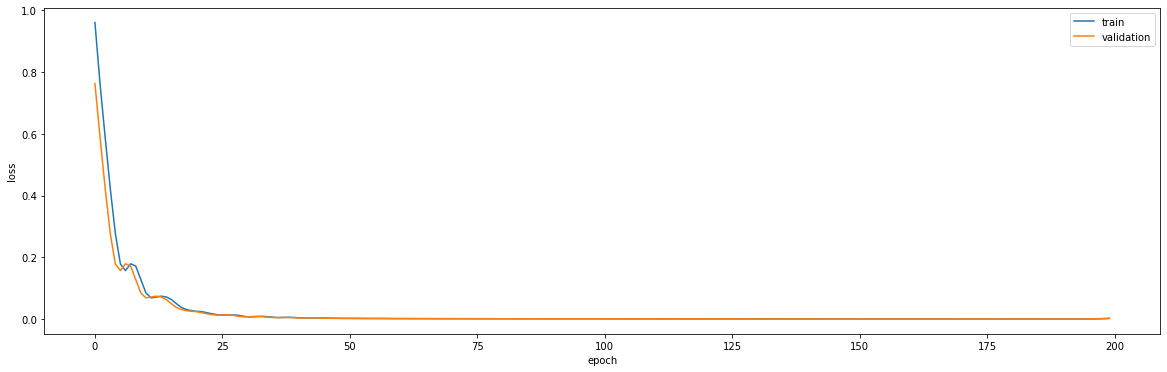

In [153]:
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [155]:
r2_score(y_test1,ann_preds)

0.9871864205401589

## XGBOOST

In [178]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

#### USING GRIDSEARCH

In [179]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train1, y_train1):
    param_tuning = {
        'learning_rate': [0.01,0.05,0.1,0.15,0.2],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 10, 100],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : range(100,1100,100),
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train1,y_train1)
    
    return gsearch.best_params_


In [180]:
hyperParameterTuning(X_train1, y_train1)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [183]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 10,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

%time xgb_model.fit(X_train1, y_train1, early_stopping_rounds=5, eval_set=[(X_test1, y_test1)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test1)

mse_xgb = mean_squared_error(y_test1, y_pred_xgb)

print("MSE: ", mse_xgb)

Wall time: 613 ms
MSE:  0.08980109579882248


In [184]:
r2_score(y_test1,y_pred_xgb)

0.9135874134787212

#### USING RANDOMIZEDSEARCHCV

In [185]:
xgb_reg=XGBRegressor(objective="reg:squarederror",
                    nthread=4,silent=0)

params={
    "num_boost_round" : [5,10,15,20,25],
    "eta" : [0.05, 0.001, 0.1, 0.3],
    "max_depth" : [3,4,5,6],
    "subsample" : [0.8,0.9,1.0],
    "colsample_bytree" : [0.8, 0.9, 1.0],
    "alpha" : [0.0,0.1, 0.3]
}
import time

In [188]:
random_search=RandomizedSearchCV(xgb_reg, params,
                                n_jobs=-1, cv=5, n_iter=500,
                                verbose=1, scoring="r2")
start=time.time()

random_search.fit(X_train1, y_train1, verbose=True)
best_parameters=random_search.best_params_

print("RandomizedSearchCV Results :")
print(random_search.best_score_)
print("Best Parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
end=time.time()
print("Time Elapsed:" + str(end-start))
print('')
print("Best Estimator:" )
print("random_search.best_estimator_")

y_pred_xgbran=random_search.predict(X_test1)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[20:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_boost_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RandomizedSearchCV Results :
0.872402331712539
Best Parameters: 
alpha: 0.0
colsample_bytree: 1.0
eta: 0.3
max_depth: 3
num_boost_round: 25
subsample: 0.9
Time Elapsed:136.96660256385803

Best Estimator:
random_search.best_estimator_


In [189]:
r2_score(y_test1,y_pred_xgbran)

0.9581358855020919

In [190]:
mean_squared_error(y_test1,y_pred_xgbran)

0.04350573808635809